# Part 1.2

In this part we will go start out by explaining how we build and modified the Graph with all the rock artists. Then we will do some analysis on the network and finally some visualizations  *

### Explanation of the Build Process for the Network

We built the rock performers network through the following steps:

**Data Collection:**
We started by fetching the wikitext page of the "List of Mainstream Rock Performers". This gave us a lot of unnecessary information, when we only really needed the links. Therefore, using a regex pattern, we created a new txt file with only the list of performers.

**Page Download:**
After collecting the list of all the performers, we proceeded to make a new directory and download all the individual artists' pages into individual .txt files. For this step, we encountered some issues with some artists having special characters in their names, which are not valid for filenames, such as "AC/DC" and "Panic! at the Disco", where "/" and "!" are not valid in filenames. Therefore, we needed to sanitize these by replacing them with "_". This turned out to help us in the end, since bands with whitespaces in their names have "_" in the Wikipedia URL.

**Link Extraction:**
To extract the links on each of the artists' wiki-pages, we used a regex pattern to look for the specific "[[...]]" or "[[...|...]]" format. Furthermore, we made sure to save these in a 'set' to avoid duplicate links, since we do not care about how *many* times artists are linked, just the fact that they *are*.

**Network Construction:**
To create the network:
- We started by initializing a directed graph (G)
- Looping over all performers in our list, for each performer we did the following:
  - Added the performer's name to G as a node
  - Used our helper function to count the number of words on their page and set this as "content_length"
  - Used our link extraction function to extract the links, making sure to filter any links which do not point to another artist
  - Finally, created directed edges to the other nodes corresponding to the links between performers
- The resulting network had 488 nodes and 7,267 edges

**Network Cleaning:**
We also inspected the network to identify any performers who are not linked to any other performers - there turned out to be 4 of those, so we removed them from the graph.

**Most Difficult Part**

The most difficult part was setting up the Wikipedia download and figuring out why we couldn't save some of the performers' wiki-text to a file. Furthermore, getting the regex just right also took some trial and error. Finally, because we changed some of the artist names in our list, we had trouble downloading their content, so we needed to "convert" their names to match their URL names.

**Use of LLMs**

For the network build, we used LLMs to help set up the API. We had some errors with 403 Forbidden, since we initially did not have a header for our API call. Furthermore, we had help developing the regex pattern and finally also help with the filename sanitization and following reconstruction for downloading the pages.

**What We Would Do Differently**

If we had to do this again, we would start with better research on how the data in Wikipedia is represented. We would also make a clearer mapping between our filenames and the actual URLs so that we did not need to deal with this issue. We might also benefit from better error handling, since we spent a fair bit of time trying to understand what was going wrong.

### Simple network analysis and statistics

**First we will fetch the graph from the github repository we made**

In [36]:
import networkx as nx
import requests
import matplotlib.pyplot as plt
import numpy as np

# Download the network file from your GitHub repo
url = "https://raw.githubusercontent.com/Pakkutaq/SG_rock_network/main/rock_artists/rock_network.graphml"

response = requests.get(url)
with open('rock_network.graphml', 'wb') as f:
    f.write(response.content)

# Load the network into G
G = nx.read_graphml('rock_network.graphml')

### How many nodes and edges(links) are there in the network:

In [37]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of nodes in the network: {num_nodes}")
print(f"Number of edges in the network: {num_edges}")

Number of nodes in the network: 484
Number of edges in the network: 7267


### In- and Out degress of each nodes with plotting:

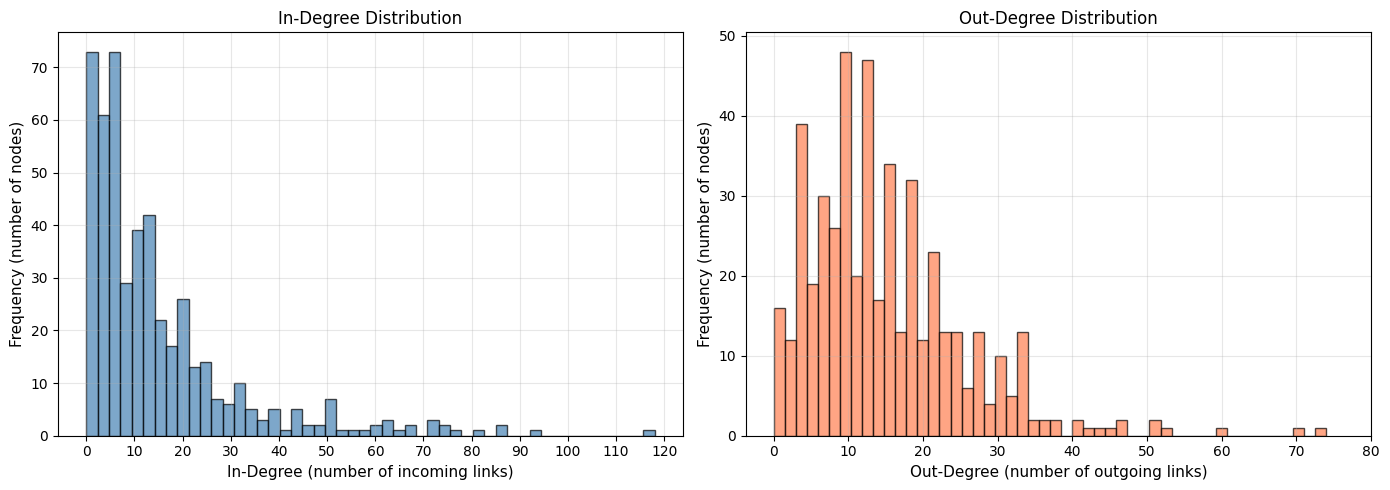

In [29]:
# Get in-degrees and out-degrees of all nodes
in_degrees = [degree for node, degree in G.in_degree()]
out_degrees = [degree for node, degree in G.out_degree()]

# Creating the subplot structure to compare in- and out-degrees
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plot for in-degree
axs[0].hist(in_degrees, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axs[0].set_xlabel('In-Degree (number of incoming links)', fontsize=11)
axs[0].set_ylabel('Frequency (number of nodes)', fontsize=11)
axs[0].set_title('In-Degree Distribution')
axs[0].grid(True, alpha=0.3)
axs[0].set_xticks(range(0, max(in_degrees)+10, 10))

# Plot for out-degree
axs[1].hist(out_degrees, bins=50, edgecolor='black', alpha=0.7, color='coral')
axs[1].set_xlabel('Out-Degree (number of outgoing links)', fontsize=11)
axs[1].set_ylabel('Frequency (number of nodes)', fontsize=11)
axs[1].set_title('Out-Degree Distribution')
axs[1].grid(True, alpha=0.3)
axs[1].set_xticks(range(0, max(out_degrees)+10, 10))

plt.tight_layout()
plt.show()

**Figure 1: In-Degree and Out-Degree Distributions of the Rock Performers Network**

The figure shows degree distributions for 484 rock performers. The in-degree distribution (left) is heavily right-skewed with most nodes having 0-10 incoming links and a long tail extending to 120. The out-degree distribution (right) is a bit more spread out, ranging from 0-75 with a peak around 10-15 links.

**Observations and Explanation:**

The distributions differ because they measure different aspects of the network. 

In-degree counts how many other performers' pages link to a given performer, reflecting their popularity and influence. The long tail appears because some very famous performers get cited a large amount.

Out-degree counts how many other performers a given page links to, reflecting citation behavior. And because it's rather limited how many links to other performers each wikipedia page has, we clearly see it more distributed but in a smaller range.

#### Comparison between out-degree of rocker performers and random graph

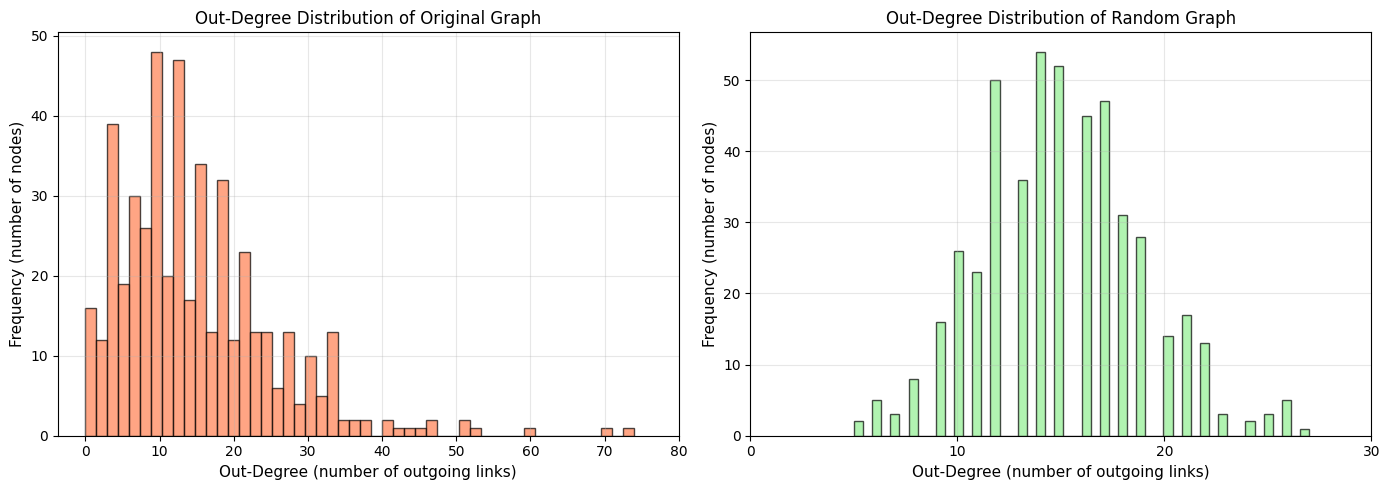

In [32]:
# Generating the random network with the same amount of nodes and links
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
random_graph = nx.gnm_random_graph(num_nodes, num_edges, directed=True)

# Comparing the out-degree to the random network
random_out_degrees = [degree for node, degree in random_graph.out_degree()]
G_out_degrees = [degree for node, degree in G.out_degree()]

fig, axs = plt.subplots(1, 2, figsize=(14, 5))
# Plot for out-degree of the original graph
axs[0].hist(G_out_degrees, bins=50, edgecolor='black', alpha=0.7, color='coral')
axs[0].set_xlabel('Out-Degree (number of outgoing links)', fontsize=11)
axs[0].set_ylabel('Frequency (number of nodes)', fontsize=11)
axs[0].set_title('Out-Degree Distribution of Original Graph')
axs[0].grid(True, alpha=0.3)
axs[0].set_xticks(range(0, max(G_out_degrees)+10, 10))  
# Plot for out-degree of the random graph
axs[1].hist(random_out_degrees, bins=50, edgecolor='black', alpha=0.7, color='lightgreen')
axs[1].set_xlabel('Out-Degree (number of outgoing links)', fontsize=11)
axs[1].set_ylabel('Frequency (number of nodes)', fontsize=11)
axs[1].set_title('Out-Degree Distribution of Random Graph')
axs[1].grid(True, alpha=0.3)
axs[1].set_xticks(range(0, max(random_out_degrees)+10, 10))

plt.tight_layout()
plt.show()


**Figure 2: Out-degree distribution of the rock_perfomers and a random graph with same number of nodes and links**

The figure shows out-degree distributions between rock performers (left) and randomly generated (right).

**Comparison**

We see a clear difference, the random graph follows a clear normal distribution, where the rock performers appear right-skewed in this scenario. Although, we notice, that the frequency between 10-20 outgoing edges, is not actually that different from eachother.

#### Comparison between in-degree and scale-free network:

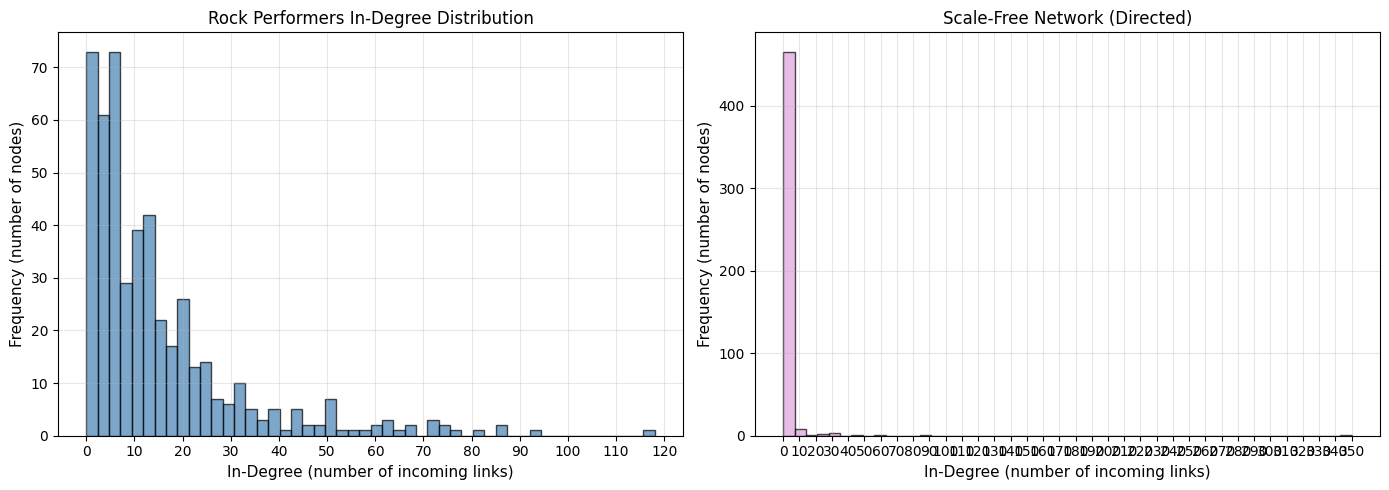

In [ ]:
# Creating the scale-free network
scale_free_graph = nx.scale_free_graph(num_nodes)

# Get in-degrees for both networks
scale_free_in_degrees = [degree for node, degree in scale_free_graph.in_degree()]
G_in_degrees = [degree for node, degree in G.in_degree()]

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plot for in-degree of the rock performers graph
axs[0].hist(G_in_degrees, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axs[0].set_xlabel('In-Degree (number of incoming links)', fontsize=11)
axs[0].set_ylabel('Frequency (number of nodes)', fontsize=11)
axs[0].set_title('Rock Performers In-Degree Distribution')
axs[0].grid(True, alpha=0.3)
axs[0].set_xticks(range(0, max(G_in_degrees)+10, 10))

# Plot for in-degree of the scale-free graph
axs[1].hist(scale_free_in_degrees, bins=50, edgecolor='black', alpha=0.7, color='plum')
axs[1].set_xlabel('In-Degree (number of incoming links)', fontsize=11)
axs[1].set_ylabel('Frequency (number of nodes)', fontsize=11)
axs[1].set_title('Scale-Free Network (Directed)')
axs[1].grid(True, alpha=0.3)
axs[1].set_xticks(range(0, max(scale_free_in_degrees)+10, 10))

plt.tight_layout()
plt.show()

**Figure 3 in-degree distribution vs scale-free network degree distribution**
The figure shows on the left the in-degree distribution of rock performers, while on the right is shown the distribution of degrees in a scale-free network.

### Top 5 most connected performers in terms of in- and out-degrees:

In [54]:
# Here we get the in- and out-degrees of all nodes as a dictionary, so we know which performer has which degree
in_degree_dict = dict(G.in_degree())
out_degree_dict = dict(G.out_degree())

# Sort by degree and select the top 5. We reverse the sorting since we want DESC order.
top_5_in_degree = sorted(in_degree_dict.items(), key=lambda x: x[1], reverse=True)[:5]
top_5_out_degree = sorted(out_degree_dict.items(), key=lambda x: x[1], reverse=True)[:5]

# Now we can prin the results
print("Top 5 performers by In-Degree:")
for performer, degree in top_5_in_degree:
    print(f"{performer}: {degree}")

print("\nTop 5 performers by Out-Degree:")
for performer, degree in top_5_out_degree:
    print(f"{performer}: {degree}")

# For our hypothesis, we expected out-degree to be somewhat correlated with page length (word count)
content_lengths = nx.get_node_attributes(G, 'content_length')

top_5_content_length = sorted(content_lengths.items(), key=lambda x: x[1], reverse=True)[:5]

print("\nTop 5 performers by Content Length (word count):")
for performer, length in top_5_content_length:
    print(f"{performer}: {length}")


Top 5 performers by In-Degree:
Led Zeppelin: 118
Bob Dylan: 93
Queen (band): 87
Metallica: 85
David Bowie: 81

Top 5 performers by Out-Degree:
Alice in Chains: 74
Deep Purple: 71
Black Sabbath: 60
Def Leppard: 52
Guns N' Roses: 51

Top 5 performers by Content Length (word count):
Bob Dylan: 20156
Paul McCartney: 19619
Elvis Presley: 18183
The Beach Boys: 18123
Queen (band): 16997


Looking at the output from above, there is really no surprise in in-degree. Every name in the top 5 are well-known bands which have been known and existed for a very long time, therefore it makes sense that a lot of other performer wiki-pages are linking to these. 

However, the top 5 out-degree performers (Alice in Chains, Deep Purple, Def Leppard) are surprising since they aren't the most iconic bands. This reveals that out-degree reflects page structure rather than fame - well-maintained contextual pages link to more artists, while famous bands' pages focus on their own story. We expected overlap with word count (longer pages = more links), but found none. The longest pages belong to the most famous performers, indicating that page length measures cultural significance and has no immediate affect the out-degree.

#### The longest wiki-entries
Finally we take a close look at the top 5 performers by content length.

In [55]:
top_10_content_length = sorted(content_lengths.items(), key=lambda x: x[1], reverse=True)[:10]

print("\nTop 10 performers by Content Length (word count):")
for performer, length in top_10_content_length:
    print(f"{performer}: {length}")



Top 10 performers by Content Length (word count):
Bob Dylan: 20156
Paul McCartney: 19619
Elvis Presley: 18183
The Beach Boys: 18123
Queen (band): 16997
David Bowie: 16738
The Beatles: 16670
The Rolling Stones: 16651
Frank Zappa: 16096
U2: 16081


As we also concluded in our hypothesis from above, the largest wiki-entries belong to some of the most well-known rock artists throughout time.

## Visualizing the networks

In [ ]:
# Converting to undirected graph for visualization
G_undirected = G.to_undirected()

# We want to get the degrees for each node, so we can set the node size accordingly
degrees = dict(G_undirected.degree())

# We want the node color to depend on the content length:
content_lengths = nx.get_node_attributes(G_undirected, 'content_length')

plt.figure(figsize=(20, 20))

pos = nx.spring_layout(G_undirected, k=0.15, iterations=50, seed=42)
# Draw the nodes
nx.draw_networkx_nodes(G_undirected, pos, node_size=[degrees[node] for node in G_undirected.nodes()],
                       node_color=[content_lengths.get(node, 0) for node in G_undirected.nodes()],
                       cmap=plt.cm.viridis, alpha=0.7)

# Draw the edges
nx.draw_networkx_edges(G_undirected, pos, alpha=0.5)

# Add labels
nx.draw_networkx_labels(G_undirected, pos, font_size=12)

plt.title("Social Network Graph (Undirected)")
plt.show()

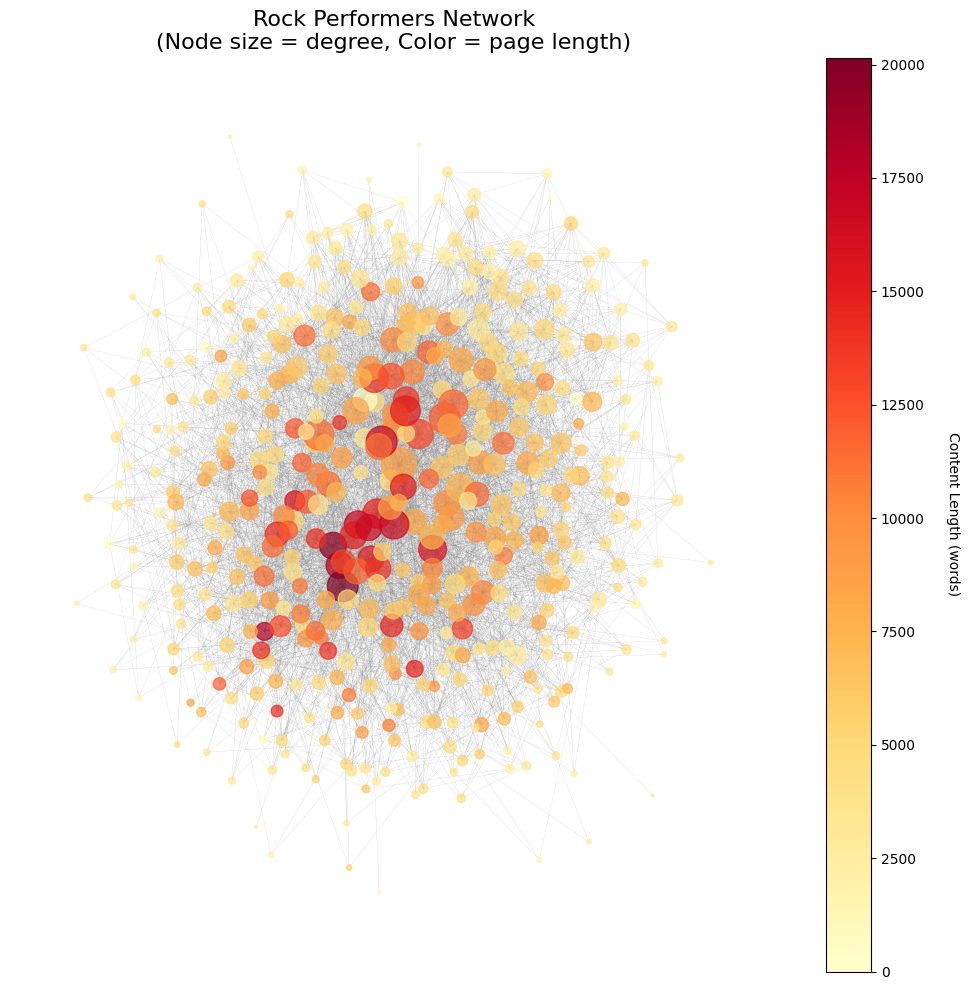

In [ ]:
# Convert to undirected graph for visualization
G_undirected = G.to_undirected()

# Get node attributes we want degrees for size and content length for color
degrees = dict(G_undirected.degree())
content_lengths = nx.get_node_attributes(G, 'content_length')

plt.figure(figsize=(10, 10))

# Use Kamada-Kawai layout
# https://en.wikipedia.org/wiki/Force-directed_graph_drawing 
# https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.kamada_kawai_layout.html
pos = nx.kamada_kawai_layout(G_undirected) 

# Making the node sizes depend on the degree with a scalar for visibility
node_sizes = [degrees[node] * 5 for node in G_undirected.nodes()]

# Making the node colors depend on the content length with a scalar for visibility
node_colors = [content_lengths.get(node, 0) for node in G_undirected.nodes()]

# Draw the network
nx.draw_networkx(
    G_undirected,
    pos,
    node_size=node_sizes,
    node_color=node_colors,
    cmap=plt.cm.YlOrRd,
    with_labels=False,
    edge_color='gray',
    alpha=0.7,
    width=0.1
)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.YlOrRd, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('Content Length (words)', rotation=270, labelpad=25)

plt.title('Rock Performers Network\n(Node size = degree, Color = page length)', fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

We see that the longer the pages are, usually the more connected they are as well, but we also see that some pages have a very long content length, but has rather low out-degree **Skrive lidt mere sener**